## Regression Model - Predicting the tmbd_score of Netflix movies

### Importing the necessary libaries fro the problem

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

### Importing our data set

In [2]:
data= pd.read_csv(r'C:\Users\IamFavoured\Desktop\IKEBUKWU\Database\Githubsite\Netflix 4\titles.csv')

In [3]:
### Lets see the first five records of our table

data.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,48,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0,27.612,8.2
2,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['comedy', 'fantasy']",['GB'],NaN,tt0071853,8.2,530877.0,18.216,7.8
3,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,['comedy'],['GB'],NaN,tt0079470,8.0,392419.0,17.505,7.8
4,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,['horror'],['US'],NaN,tt0070047,8.1,391942.0,95.337,7.7


In [4]:
### Lets see the bottom five records of our table

data.tail()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
5801,tm1014599,Fine Wine,MOVIE,A beautiful love story that can happen between...,2021,NaN,100,"['romance', 'drama']",['NG'],NaN,tt13857480,6.9,39.0,0.966,NaN
5802,tm1108171,Edis Starlight,MOVIE,Rising star Edis's career journey with ups and...,2021,NaN,74,"['music', 'documentation']",[],NaN,NaN,NaN,NaN,1.036,8.5
5803,tm1045018,Clash,MOVIE,A man from Nigeria returns to his family in Ca...,2021,NaN,88,"['family', 'drama']","['NG', 'CA']",NaN,tt14620732,6.5,32.0,0.709,NaN
5804,tm1098060,Shadow Parties,MOVIE,A family faces destruction in a long-running c...,2021,NaN,116,"['action', 'thriller']",[],NaN,tt10168094,6.2,9.0,2.186,NaN
5805,ts271048,Mighty Little Bheem: Kite Festival,SHOW,"With winter behind them, Bheem and his townspe...",2021,NaN,0,"['family', 'comedy', 'animation']",[],1.0,tt13711094,8.8,16.0,0.979,10.0


### Data Exploration and Cleansing 

In [5]:
## Statistical data of Numerical columns
data.describe()

,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
count,5806.000000,5806.000000,2047.000000,5283.000000,5.267000e+03,5712.000000,5488.000000
mean,2016.013434,77.643989,2.165608,6.533447,2.340719e+04,22.525660,6.818039
std,7.324883,39.474160,2.636207,1.160932,8.713432e+04,68.849177,1.171560
min,1945.000000,0.000000,1.000000,1.500000,5.000000e+00,0.009442,0.500000
25%,2015.000000,44.000000,1.000000,5.800000,5.210000e+02,3.155250,6.100000
50%,2018.000000,84.000000,1.000000,6.600000,2.279000e+03,7.478000,6.900000
75%,2020.000000,105.000000,2.000000,7.400000,1.014400e+04,17.775750,7.500000
max,2022.000000,251.000000,42.000000,9.600000,2.268288e+06,1823.374000,10.000000


In [6]:
### Basic information about our data frame i.e datatype and count
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5806 entries, 0 to 5805
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5806 non-null   object 
 1   title                 5805 non-null   object 
 2   type                  5806 non-null   object 
 3   description           5788 non-null   object 
 4   release_year          5806 non-null   int64  
 5   age_certification     3196 non-null   object 
 6   runtime               5806 non-null   int64  
 7   genres                5806 non-null   object 
 8   production_countries  5806 non-null   object 
 9   seasons               2047 non-null   float64
 10  imdb_id               5362 non-null   object 
 11  imdb_score            5283 non-null   float64
 12  imdb_votes            5267 non-null   float64
 13  tmdb_popularity       5712 non-null   float64
 14  tmdb_score            5488 non-null   float64
dtypes: float64(5), int64(

In [7]:
## Lets check our shape
data.shape

(5806, 15)

In [8]:
## Checking for null values
## We will clean the nan values as we go on
## Reason for this will be shared as we go on

data.isnull().sum()

id                         0
title                      1
type                       0
description               18
release_year               0
age_certification       2610
runtime                    0
genres                     0
production_countries       0
seasons                 3759
imdb_id                  444
imdb_score               523
imdb_votes               539
tmdb_popularity           94
tmdb_score               318
dtype: int64

### Dropping columns not needed for Regression model

In [9]:
data.columns

Index(['id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'genres', 'production_countries',
       'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity',
       'tmdb_score'],
      dtype='object')

In [10]:
### Since we are dealing with a regression model
## Lets ddrop some non numerical column that does not apply

new_data= data.drop(columns = ['id','title','description','production_countries','seasons','imdb_id','release_year','age_certification','runtime','genres'])
new_data

,type,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,SHOW,NaN,NaN,0.600,NaN
1,MOVIE,8.3,795222.0,27.612,8.2
2,MOVIE,8.2,530877.0,18.216,7.8
3,MOVIE,8.0,392419.0,17.505,7.8
4,MOVIE,8.1,391942.0,95.337,7.7
...,...,...,...,...,...
5801,MOVIE,6.9,39.0,0.966,NaN
5802,MOVIE,NaN,NaN,1.036,8.5
5803,MOVIE,6.5,32.0,0.709,NaN
5804,MOVIE,6.2,9.0,2.186,NaN


In [11]:
## Counting the values of the non-numerical column
## We  will also need to perform one hot encoding on this column
## Because we will need the type of show to predict the tmbd score

new_data.type.value_counts()

MOVIE    3759
SHOW     2047
Name: type, dtype: int64

### Performing One-hot Encoding on our feature

In [12]:
## Sklearn lib to perform the task

from sklearn.preprocessing import OneHotEncoder

In [13]:
## Instantiabe the model as an object of a class
ohe=OneHotEncoder()

In [14]:
feature_array= ohe.fit_transform(new_data[['type']]).toarray()
feature_array

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [0., 1.]])

In [15]:
ohe.categories_

[array(['MOVIE', 'SHOW'], dtype=object)]

In [16]:
feature_names=np.array(ohe.categories_).ravel()
feature_names

array(['MOVIE', 'SHOW'], dtype=object)

In [17]:
features = pd.DataFrame(feature_array, columns=feature_names)
features

,MOVIE,SHOW
0,0.0,1.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0
...,...,...
5801,1.0,0.0
5802,1.0,0.0
5803,1.0,0.0
5804,1.0,0.0


In [18]:
new_data=pd.concat([new_data,features], axis =1)
new_data

,type,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,MOVIE,SHOW
0,SHOW,NaN,NaN,0.600,NaN,0.0,1.0
1,MOVIE,8.3,795222.0,27.612,8.2,1.0,0.0
2,MOVIE,8.2,530877.0,18.216,7.8,1.0,0.0
3,MOVIE,8.0,392419.0,17.505,7.8,1.0,0.0
4,MOVIE,8.1,391942.0,95.337,7.7,1.0,0.0
...,...,...,...,...,...,...,...
5801,MOVIE,6.9,39.0,0.966,NaN,1.0,0.0
5802,MOVIE,NaN,NaN,1.036,8.5,1.0,0.0
5803,MOVIE,6.5,32.0,0.709,NaN,1.0,0.0
5804,MOVIE,6.2,9.0,2.186,NaN,1.0,0.0


In [19]:
## We will be dropping the initial column and another column to prevent dummy variable trap

new_data.drop(columns=['type','SHOW'],inplace=True)

In [20]:
new_data

,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,MOVIE
0,NaN,NaN,0.600,NaN,0.0
1,8.3,795222.0,27.612,8.2,1.0
2,8.2,530877.0,18.216,7.8,1.0
3,8.0,392419.0,17.505,7.8,1.0
4,8.1,391942.0,95.337,7.7,1.0
...,...,...,...,...,...
5801,6.9,39.0,0.966,NaN,1.0
5802,NaN,NaN,1.036,8.5,1.0
5803,6.5,32.0,0.709,NaN,1.0
5804,6.2,9.0,2.186,NaN,1.0


### Splitting our data set

In [21]:
## We need to split the data before filling nan values to prevent "data leakage"

from sklearn.model_selection import train_test_split

In [22]:
train,test =train_test_split(new_data,random_state=42,test_size=0.2)

In [23]:
column=train.columns

### Filling our Nan Values through iterative imputer

In [24]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [25]:
itera = IterativeImputer()

In [26]:
train= itera.fit_transform(train)
train_data=pd.DataFrame(train,columns=column)

In [27]:
test= itera.fit_transform(test)
test_data=pd.DataFrame(test,columns=column)

In [28]:
test_data.isnull().sum()

imdb_score         0
imdb_votes         0
tmdb_popularity    0
tmdb_score         0
MOVIE              0
dtype: int64

In [29]:
train_data.isnull().sum()

imdb_score         0
imdb_votes         0
tmdb_popularity    0
tmdb_score         0
MOVIE              0
dtype: int64

## Selecting Our features

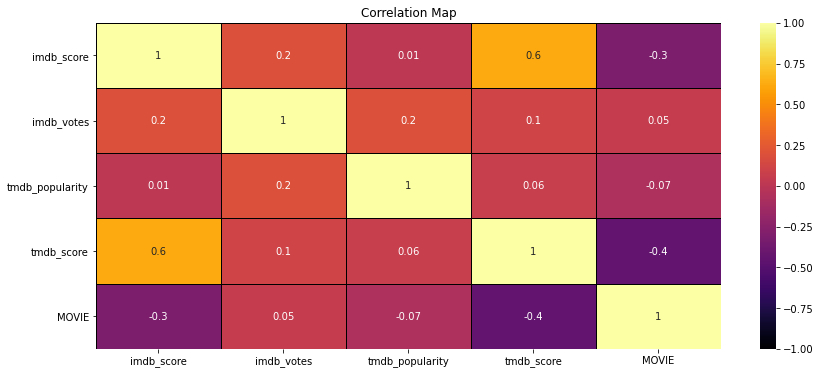

In [30]:
## Lets use a heatmap to visualize the correlation coefficients that will enable us select better features in selecting our model
## Less number of features mean less noise and better accuracy of the model
## 'IMDB_SCORE' column  has a strong positive correlation
## 'MOVIE' column has a weak negative correlation

## Those 2 columns will be what we will use in building our model

plt.figure(figsize=(14,6))
sns.heatmap(train_data.corr(),annot=True,fmt='.1g',vmin=-1,vmax=1,center=0,cmap='inferno',linewidths=1,linecolor='Black').set(title='Correlation Map');

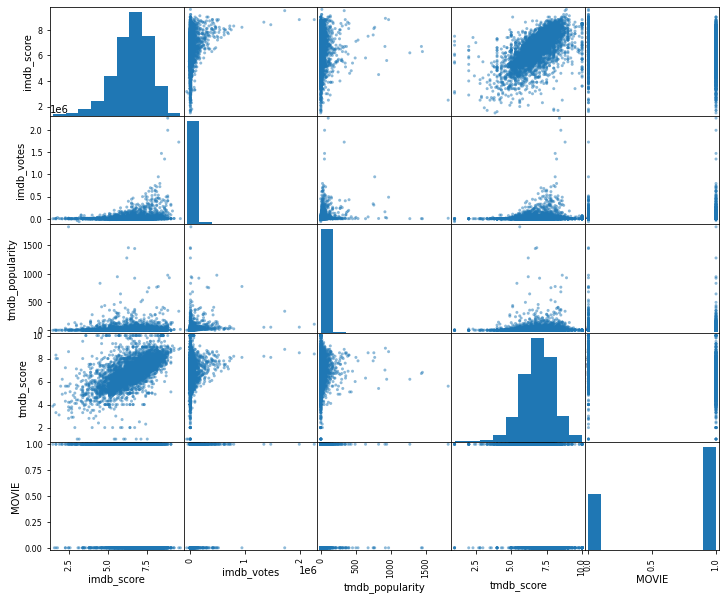

In [31]:
## Using also a scatter plot will help us solidify our claim

pd.plotting.scatter_matrix(train_data,figsize=(12,10));  

In [32]:
train_data.drop(columns=['imdb_votes','tmdb_popularity'], inplace=True)
train_data

,imdb_score,tmdb_score,MOVIE
0,5.7,5.6,1.0
1,8.3,8.4,0.0
2,5.8,6.8,0.0
3,6.3,7.0,0.0
4,5.3,5.0,1.0
...,...,...,...
4639,5.8,5.9,1.0
4640,6.6,7.1,1.0
4641,5.7,6.9,1.0
4642,5.2,5.6,1.0


### Looking for outliers 

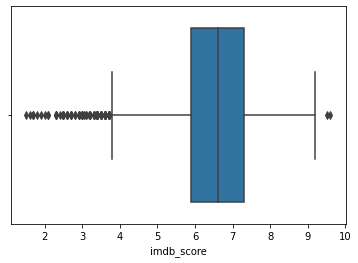

In [33]:
## Outliers in our features can also reduce the accuracy
## lets check for outliers in the 'imdb score'

sns.boxplot(x=train_data.imdb_score);

In [34]:
train_data.describe()

,imdb_score,tmdb_score,MOVIE
count,4644.000000,4644.000000,4644.000000
mean,6.528372,6.818998,0.646210
std,1.143661,1.158555,0.478196
min,1.500000,1.000000,0.000000
25%,5.891987,6.100000,0.000000
50%,6.600000,6.900000,1.000000
75%,7.300000,7.500000,1.000000
max,9.600000,10.000000,1.000000


In [35]:
train_data.shape ## data shape

(4644, 3)

In [36]:
##lets write a function to drop our outliers to inorder to remove errors from our model

def drop_outlier(df,field_name):
    iqr = 1.5*(np.percentile(df[field_name],75)-np.percentile(df[field_name],25))
    df.drop(df[df[field_name] >(iqr+np.percentile(df[field_name],75))].index, inplace=True)
    df.drop(df[df[field_name] <(np.percentile(df[field_name],25) - iqr)].index, inplace=True)
    

In [37]:
drop_outlier(train_data,'imdb_score')

In [38]:
train_data.shape

(4541, 3)

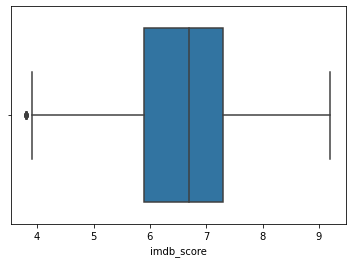

In [39]:
sns.boxplot(x=train_data.imdb_score);

In [40]:
### Now we have cleaned our datasets
### Lets get our features and targets for our data sets

## Extracting our Datasets

In [41]:
X_train=train_data.drop(columns=['tmdb_score'])
y_train=train_data.tmdb_score
X_test=test_data.drop(columns=['imdb_votes','tmdb_popularity','tmdb_score'])
y_test=test_data.tmdb_score

## Get our model

In [42]:
## Lets use stacking ensemble method

from sklearn.linear_model import HuberRegressor,LinearRegression,Lasso

In [49]:
from sklearn.ensemble import StackingRegressor,RandomForestRegressor

In [46]:
estimators =[('hu',HuberRegressor()),('Lr',LinearRegression()),('La',Lasso())]

In [53]:
sta=StackingRegressor(estimators=estimators,cv=6)

In [54]:
sta.fit(X_train,y_train)

StackingRegressor(cv=6,
                  estimators=[('hu', HuberRegressor()),
                              ('Lr', LinearRegression()), ('La', Lasso())])

In [55]:
sta.score(X_test,y_test)

0.44378487139461964

In [56]:
sta.score(X_train,y_train)

0.44219778127964005